# Project 6 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- Get help from piazza
- Get help from Dr. Ward's video

## Question 1

In [2]:
tracks <- read.csv("/depot/datamine/data/amazon/tracks.csv")

In [3]:
dim(tracks)

[1] 1000000       1

In [4]:
str(tracks)

'data.frame':	1000000 obs. of  1 variable:
 $ track_id.title.song_id.release.artist_id.artist_mbid.artist_name.duration.artist_familiarity.artist_hotttnesss.year.track_7digitalid.shs_perf.shs_work: chr  "TRMMMYQ128F932D901|Silent Night|SOQMMHC12AB0180CB8|Monster Ballads X-Mas|ARYZTJS1187B98C555|357ff05d-848a-44cf-"| __truncated__ "TRMMMKD128F425225D|Tanssi vaan|SOVFVAK12A8C1350D9|Karkuteillä|ARMVN3U1187FB3A1EB|8d7ef530-a6fd-4f8f-b2e2-74aec7"| __truncated__ "TRMMMRX128F93187D9|No One Could Ever|SOGTUKN12AB017F4F1|Butter|ARGEKB01187FB50750|3d403d44-36ce-465c-ad43-ae877"| __truncated__ "TRMMMCH128F425532C|Si Vos Querés|SOBNYVR12A8C13558C|De Culo|ARNWYLR1187B9B2F9C|12be7648-7094-495f-90e6-df4189d6"| __truncated__ ...


In [1]:
tracks <- read.csv("/depot/datamine/data/amazon/tracks.csv",sep="|")

In [6]:
dim(tracks)

[1] 1000000      14

In [7]:
str(tracks)

'data.frame':	1000000 obs. of  14 variables:
 $ track_id          : chr  "TRMMMYQ128F932D901" "TRMMMKD128F425225D" "TRMMMRX128F93187D9" "TRMMMCH128F425532C" ...
 $ title             : chr  "Silent Night" "Tanssi vaan" "No One Could Ever" "Si Vos Querés" ...
 $ song_id           : chr  "SOQMMHC12AB0180CB8" "SOVFVAK12A8C1350D9" "SOGTUKN12AB017F4F1" "SOBNYVR12A8C13558C" ...
 $ release           : chr  "Monster Ballads X-Mas" "Karkuteillä" "Butter" "De Culo" ...
 $ artist_id         : chr  "ARYZTJS1187B98C555" "ARMVN3U1187FB3A1EB" "ARGEKB01187FB50750" "ARNWYLR1187B9B2F9C" ...
 $ artist_mbid       : chr  "357ff05d-848a-44cf-b608-cb34b5701ae5" "8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9" "3d403d44-36ce-465c-ad43-ae877e65adc4" "12be7648-7094-495f-90e6-df4189d68615" ...
 $ artist_name       : chr  "Faster Pussy cat" "Karkkiautomaatti" "Hudson Mohawke" "Yerba Brava" ...
 $ duration          : num  252 157 139 145 514 ...
 $ artist_familiarity: num  0.65 0.44 0.644 0.449 0 ...
 $ artist_hotttnesss : n

In [8]:
head(tracks)

track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.0551,0.6498221,0.3940319,2003,7032331,-1,0
TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.5514,0.4396040,0.3569921,1995,1514808,-1,0
TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.9710,0.6436806,0.4375038,2006,6945353,-1,0
TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.0575,0.4485012,0.3723491,2003,2168257,-1,0
TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.2983,0.0000000,0.0000000,0,2264873,-1,0
TRMMMXN128F42936A5,"Symphony No. 1 G minor ""Sinfonie Serieuse""/Allegro con energia",SOZVAPQ12A8C13B63C,Berwald: Symphonies Nos. 1/2/3/4,AR2NS5Y1187FB5879D,d087b377-bab7-46c4-bd12-15debebb5d61,David Montgomery,816.5351,0.3612870,0.1096258,0,3360982,-1,0


We can see that originally it has only 1 column, and there are many "|" in that column; After using "sep" when reading the data, there are 14 columns now being seperated by "|", and "str" command gives us information about each column.

## Question 2

In [9]:
library(RSQLite)

con <- dbConnect(SQLite(), dbname = "/depot/datamine/data/amazon/tracks.db")
myDF <- dbGetQuery(con, "SELECT year, AVG(duration) AS average_duration FROM songs GROUP BY year;")
head(myDF)

year,average_duration
<int>,<dbl>
0,252.3017
1922,222.2363
1924,186.1690
1925,185.5846
1926,185.9089
1927,183.8967


In [11]:
head(tapply(tracks$duration, tracks$year, mean))

0     1922     1924     1925     1926     1927 
252.3017 222.2363 186.1690 185.5846 185.9089 183.8967

As we can see, the results of the given code is exactly the same as the result if we use tapply function.

## Question 3

In [12]:
G <- tapply(tracks$duration, tracks$year, mean)

In [14]:
length(G)

[1] 90

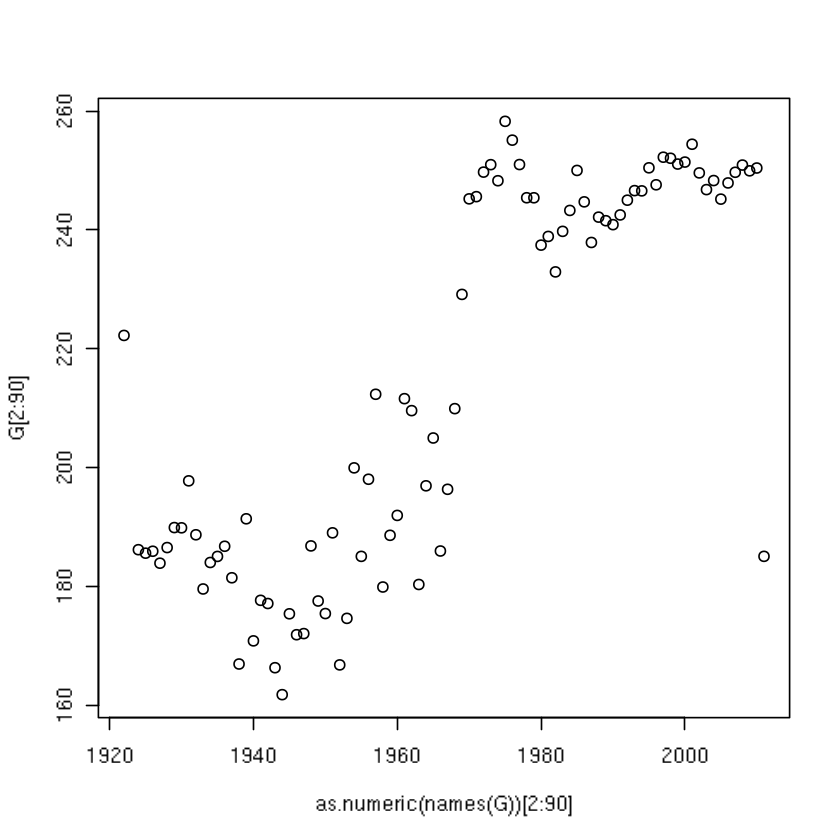

In [19]:
plot(as.numeric(names(G))[2:90], G[2:90])

Except for several outliers, as the time goes by, the duration of musics is became longer and longer. (As the year increases, duration increases, in the general trend).

## Question 4

In [2]:
head(tapply(tracks$duration, tracks$artist_name, median))

->School<-          -123 minut            -123min.                 -M- 
           215.4575            228.9367            238.9677            174.2232 
:Blacks On :Blondes          :Metaphor: 
           291.7873            307.6044

In [3]:
head(sort(tapply(tracks$duration, tracks$artist_name, median), decreasing=T))

Ustad Rashid Khan            Galexis       Heiko Grauel         Kushal Das 
          3033.600           3033.443           3032.581           3032.502 
         Francis B Buddhadev Dasgupta 
          3030.622           3030.178

The artist_name with the highest median duration is "Ustad Rashid Khan". The 5 results sorted in decreasing order is listed above.

## Question 5

In [ ]:
# Question: Plot the average duration with respect to artist_hotttnesss. Are there any patterns? What is the artist_hotttnesss of the lowest average duration?

In [4]:
H <- tapply(tracks$duration, tracks$artist_hotttnesss, mean)

In [6]:
length(H)

[1] 43476

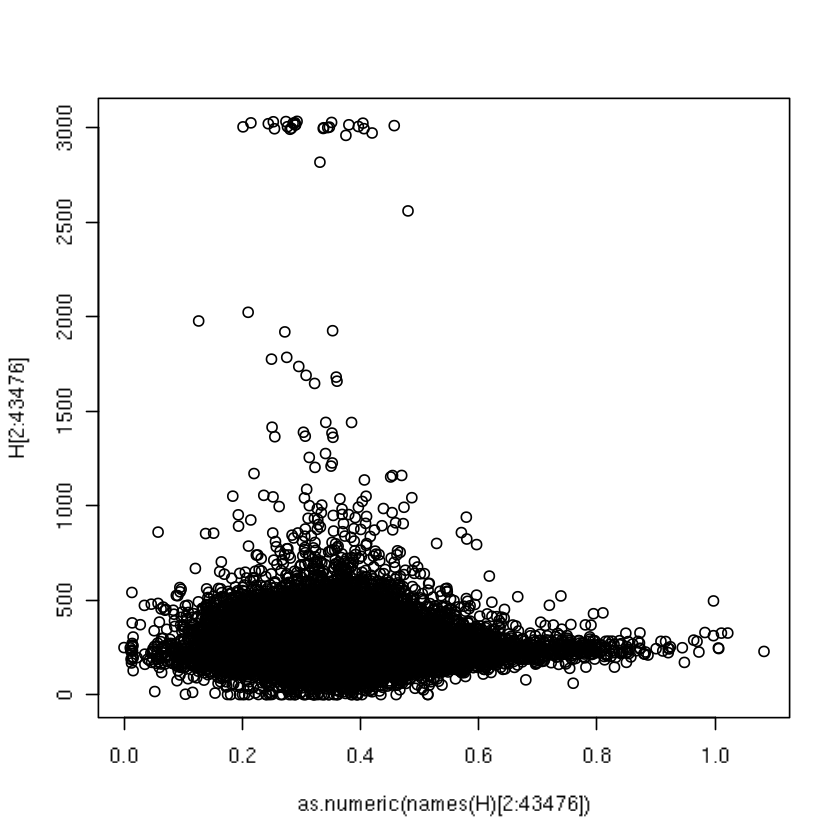

In [7]:
plot(as.numeric(names(H)[2:43476]),H[2:43476])

In [9]:
head(sort(H))

0.346540022968 0.241032440462 0.288817969432 0.395026516748 0.267992430844 
      0.417510       0.469750       0.495870       0.495870       0.495875 
0.211040665303 
      0.522000

As the result, the plot shows no obvious pattern but extremely high durations have artist_hotttnesss in range between 0.2 and 0.5. The artist_hotttnesss of the lowest average duration is around 0.3465, as calculated above.

## Question 6

In [ ]:
# Average duration with respect to different artist_familiarity

In [28]:
library(RSQLite)

con <- dbConnect(SQLite(), dbname = "/depot/datamine/data/amazon/tracks.db")
myDF <- dbGetQuery(con, "SELECT artist_hotttnesss, AVG(duration) AS average_duration FROM songs GROUP BY artist_hotttnesss;")

In [29]:
head(myDF)

artist_hotttnesss,average_duration
<dbl>,<dbl>
-1.00000000,369.2164
0.00000000,249.6095
0.01056930,247.9391
0.01156180,230.9681
0.01197357,234.9472
0.01206186,189.4424


In [34]:
length(myDF$artist_hotttnesss)

[1] 43476

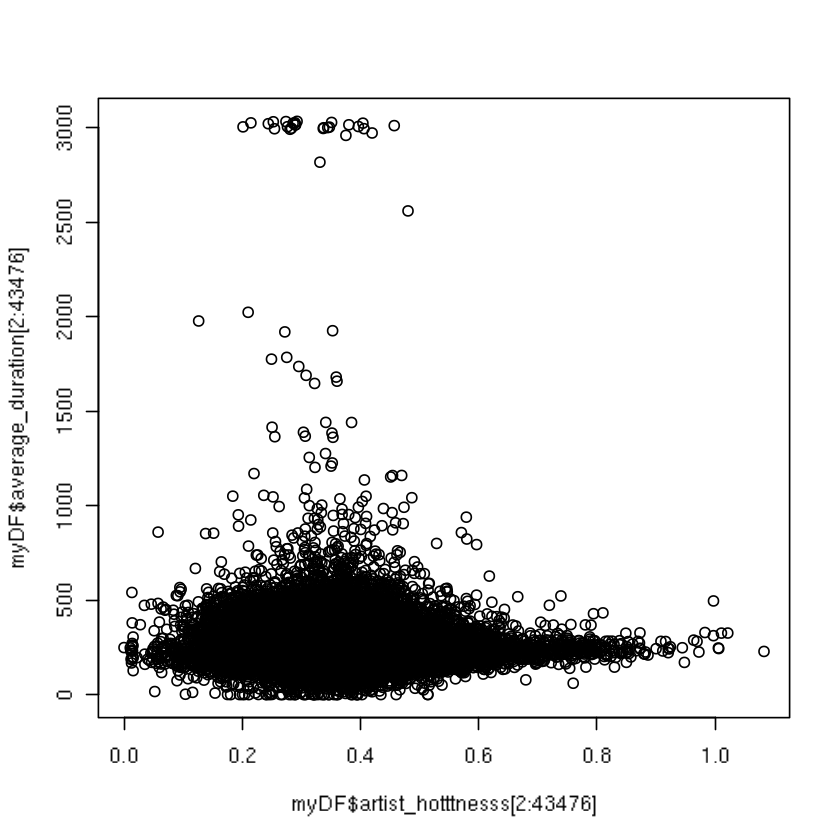

In [35]:
plot(myDF$artist_hotttnesss[2:43476], myDF$average_duration[2:43476])

I got the same result as in question# 5, using the SQL code provided.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.